## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]# number of rows =294478

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()#this the number of unique users

290584

d. The proportion of users converted.

In [5]:
(df.converted==1).sum()/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
new_page_no_treatment_mask=((df.landing_page=="new_page") & (df.group!="treatment"))
#getting the values of new page and doesn't match treatment 
treatment_no_new_page_mask=((df.landing_page!="new_page") & (df.group=="treatment"))
#getting the values of treatment and doesn't match new page

treat=df[(new_page_no_treatment_mask |treatment_no_new_page_mask)]
treat.shape
#3893 is number of mismatching 

(3893, 5)

f. Do any of the rows have missing values?

In [7]:
(df.isna()).sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
new_page_no_treatment_mask=((df.landing_page=="new_page") & (df.group!="treatment"))
#getting the values of new page and doesn't match treatment 
treatment_no_new_page_mask=((df.landing_page!="new_page") & (df.group=="treatment"))
#getting the values of treatment and doesn't match new page


old_page_no_control_mask=((df.landing_page=="old_page") & (df.group!="control"))
#getting the values of old page and doesn't match control 
control_no_old_page_mask=((df.landing_page!="old_page") & (df.group=="control"))
#getting the values of control and doesn't match old page


mismatch1=(new_page_no_treatment_mask |treatment_no_new_page_mask)
#when there is a mismatch between new page and treatment 
mismatch2=(old_page_no_control_mask | control_no_old_page_mask)
#when there is a mismatch between old page and control 

df2=df[~(mismatch1 |mismatch2)]#new_data set 


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2[df2.user_id==df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.sum()/df2.shape[0]
#sum because convertion ==1 you may use mean also

0.11959667567149027

In [15]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
control=df2[df2.group=="control"]#geting the control group 

control.converted.sum()/control.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
treatment=df2[df2.group=="treatment"]#geting the treatment  group 

treatment.converted.sum()/treatment.shape[0]

0.11880724790277405

d. What is the probability that an individual received the new page?

In [18]:
(df2.landing_page=="new_page").sum()/df2.shape[0]
#sum because convertion ==1 you may use mean also

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

    no the new treatment doesn;t lead to more conversion 

    probabilty of conversion in the treatment group is %11.8

    probabilty of conversion in the control group is %12


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

    null --- old_page.conversion_rate >= new_page.conversion_rate

    alternative --- old_page.conversion_rate < new_page.conversion_rate

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [19]:
p_new=df2.converted.sum()/df2.shape[0]#sum because convertion ==1 you may use mean also

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new=df2.converted.sum()/df2.shape[0]#sum because convertion ==1 you may use mean also

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old=df2.converted.sum()/df2.shape[0]#sum because convertion ==1 you may use mean also

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new=df2[df2["group"]=="treatment"]["user_id"].nunique() #number of unique indivuals in new page /treatment 

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old=df2[df2["group"]=="control"]["user_id"].nunique()#number of unique indivuals in new page /treatment

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted =np.random.choice( [1,0],size = n_new, replace = True, p = (p_new, 1-p_new)) 
#generate 1 with probabilty p new and 0 with the complment probabilty

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted =np.random.choice( [1,0],size = n_old, replace = True, p = (p_old, 1-p_old))
#generate 1 with probabilty p old and 0 with the complment probabilty

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
np.mean(new_page_converted)-np.mean(old_page_converted)

-0.0010413651721126183

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
#simluation process
p_diffs=[]
size=df2.shape[0]
for _ in range(10000):
    new_rate =np.random.choice( [1,0],size = n_new, replace = True, p = (p_new, 1-p_new)).mean()
    old_rate =np.random.choice( [1,0],size = n_old, replace = True, p = (p_old, 1-p_old)).mean()

    p_diffs.append(old_rate-new_rate)
    
p_diffs=np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

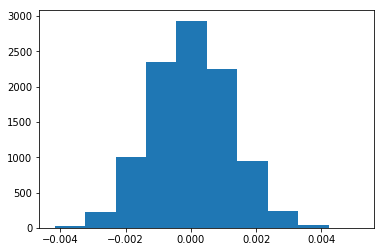

In [28]:
plt.hist(p_diffs);#plotting histogram

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
obs_treatment=df2[df2["group"]=="treatment"].converted.mean()
obs_control=df2[df2["group"]=="control"].converted.mean()
obs_difference=obs_treatment-obs_control
obs_difference   #observed differnce 

-0.0015790565976871451

In [30]:
(p_diffs>obs_difference).mean()

0.90680000000000005

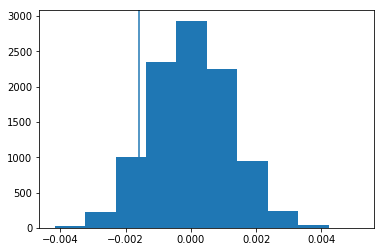

In [31]:
plt.hist(p_diffs)
plt.axvline(obs_difference)

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

    we want to match the real difference from the data with the simlatued one to make sure that we have the same distribution 

    here we have p value ==90 which means that the old pages is better than the new one and we don't have evidence to reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = df2[df2.landing_page=="old_page"].converted.sum()
convert_new =  df2[df2.landing_page=="new_page"].converted.sum()
n_old = df2[df2.landing_page=="old_page"].user_id.nunique()
n_new = df2[df2.landing_page=="new_page"].user_id.nunique()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
print(convert_old)
print(convert_new)
print(n_old)
print(n_new)


17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

    z-score (also called a standard score) gives you an idea of how far from the mean a data point is

    p value = 90 , to high we can't reject the null hypothesis 

    it agrees with our calclations 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

    logisitic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2[["new_page","old_page"]]=pd.get_dummies(df2["landing_page"])
df2[["control","treatment"]]=pd.get_dummies(df2["group"])
df2.drop(["old_page","control"],axis=1,inplace=True)
df2.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,user_id,timestamp,group,landing_page,converted,new_page,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [36]:

df2["intercipt"]=1
model=sm.Logit(df2["converted"],df2[["intercipt","treatment"]])
result=model.fit()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:               8.085e-06
Time:                        11:32:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercipt     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

In [38]:
p_value=(1-(0.19)/2)
p_value

0.905

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?


    - null --- old_page.conversion_rate == new_page.conversion_rate

    - alternative --- old_page.conversion_rate != new_page.conversion_rate

    - changing the null and alternative hypothesisi will result into change the p_value 

    - you can notice that the p_value have been doubled this is due the regression is two tailed approch so it sum the both extreme side 

    - in other hand the hypothesis we calclated before just include one side , you can notice how we can get the same result as before from the cell above 



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It will be a good idea if we add the duration as an extra feature this and sure collecting new feature about the age ,gender of the user will be helpful , we can also use the interaction between these features 

the only disadvantage of this will add extra complexty 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries=pd.read_csv("countries.csv")

countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
df_new = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')


In [41]:
df_new[["CA","UK","US"]]=pd.get_dummies(df_new["country"])
df_new.head()

,country,timestamp,group,landing_page,converted,new_page,treatment,intercipt,CA,UK,US
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,0,1,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,1,0,0,1


In [42]:

# df2["intercipt"]=1
model=sm.Logit(df_new["converted"],df_new[["intercipt","CA","UK"]])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        11:32:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercipt     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

this surely not a statistically significant 

p value of 0.129 and 0.456 is considered to high  

# trials

In [43]:
df_new["UK_PAGE"]=df_new["UK"]*df_new["treatment"]
df_new["CA_PAGE"]=df_new["CA"]*df_new["treatment"]
df_new["US_PAGE"]=df_new["US"]*df_new["treatment"]


In [44]:
model=sm.Logit(df_new["converted"],df_new[["intercipt","CA","UK","UK_PAGE","CA_PAGE"]])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            4
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:               2.417e-05
Time:                        11:32:42   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2729
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercipt     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
CA            -0.0073      0.037     -0.196      0.844      -0.080       0.065
UK             0.0045      0.018      0.258      0.797      -0.030       0.039
UK_PAGE        0.0108      0.023      0.475      0.635      -0.034       0.056
CA_PAGE       -0.0674      0.052     -1.297      0.195      -0.169       0.034
==============================================================================
"""

failed to reject null hypothesis beacuase p value is too large

In [45]:
model=sm.Logit(df_new["converted"],df_new[["intercipt","UK_PAGE","CA_PAGE"]])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:               2.364e-05
Time:                        11:32:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.08085
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercipt     -1.9963      0.006   -322.050      0.000      -2.008      -1.984
UK_PAGE        0.0149      0.017      0.862      0.389      -0.019       0.049
CA_PAGE       -0.0752      0.038     -1.997      0.046      -0.149      -0.001
==============================================================================
"""

CA_PAGE p value is less than 5% so we can use it to refuse the null hypthesis (statistically significant)

In [46]:
model=sm.Logit(df_new["converted"],df_new[["intercipt","CA_PAGE","treatment"]])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:               2.481e-05
Time:                        11:32:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.07142
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercipt     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
CA_PAGE       -0.0712      0.038     -1.871      0.061      -0.146       0.003
treatment     -0.0115      0.012     -0.994      0.320      -0.034       0.011
==============================================================================
"""

CA_PAGE p value is less than 5% so we can use it to refuse the null hypthesis (statistically significant)

In [47]:
model=sm.Logit(df_new["converted"],df_new[["intercipt","CA","UK","UK_PAGE","CA_PAGE","treatment"]])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:               3.483e-05
Time:                        11:32:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercipt     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
UK_PAGE        0.0314      0.027      1.181      0.238      -0.021       0.084
CA_PAGE       -0.0469      0.054     -0.872      0.383      -0.152       0.059
treatment     -0.0206      0.014     -1.506      0.132      -0.047       0.006
==============================================================================
"""

In [48]:
model=sm.Logit(df_new["converted"],df_new[["intercipt","CA_PAGE"]])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 04 Nov 2020   Pseudo R-squ.:               2.016e-05
Time:                        11:32:44   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.03835
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercipt     -1.9944      0.006   -344.690      0.000      -2.006      -1.983
CA_PAGE       -0.0771      0.038     -2.052      0.040      -0.151      -0.003
==============================================================================
"""

CA_PAGE p value is less than 5% so we can use it to refuse the null hypthesis (statistically significant)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

# conclusion 

The project is divided into three stages 

    1 - Probabilty : Getting general portions from the given data set 
    
    2 - A/B Testing : Assuming A null and alternative hypothesis , simulate the null hypothesis in check the difference in the distribution between what you simulated and the given sample
    
    3 - Regression : using logistic regression to so how much you can relat differet features , check the interaction between both of them
    
    
    
    
##### In Probabilty : 
    we have calclated different values which make us have a better understanding of the data set
##### In A/b Testing : 
    we assumed that our new page is  not better than the old one and we tried to proof that it's wrong but we couldn't 
##### In regression : 
    we assumed that there is no differnece between the new and old one and we tried to proof it's wrong and we also couldn't 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0